In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\Company_Data.csv')

In [60]:
df.corr()['Sales_h']

CompPrice      0.030673
Income         0.130559
Advertising    0.256914
Population     0.074759
Price         -0.387046
Age           -0.183524
Education     -0.032861
Urban         -0.050327
US             0.149324
Sales_h        1.000000
Good           0.365781
Medium        -0.054298
Name: Sales_h, dtype: float64

In [55]:
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_h,Good,Medium
0,138,73,11,276,120,42,7,1,1,1,0,0
1,111,48,16,260,83,65,0,1,1,1,1,0
2,113,35,10,269,80,59,2,1,1,1,0,1
3,117,100,4,466,97,55,4,1,1,0,0,1
4,141,64,3,340,128,38,3,1,0,0,0,0


In [39]:
df['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

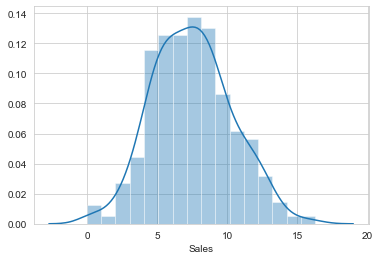

In [40]:
sns.set_style('whitegrid')
sns.distplot(df['Sales'])

In [41]:
df['Sales'].mean()

7.496325

In [42]:
df['Sales_h']=df['Sales'].apply(lambda x : 1 if x > 7.5  else 0)

In [61]:
df['Age'].value_counts()

62    14
80    13
61    12
76    11
65    10
45    10
73    10
55    10
64    10
34     9
39     9
42     9
56     9
25     9
54     8
33     8
26     8
44     8
60     8
50     8
51     8
57     8
79     8
72     8
41     7
36     7
43     7
29     7
28     7
63     7
75     6
32     6
30     6
35     6
38     6
77     6
27     6
66     6
74     6
53     6
48     6
69     6
52     6
47     6
71     5
58     5
59     5
67     5
49     4
78     4
70     4
46     4
68     4
37     3
40     3
31     3
Name: Age, dtype: int64

In [44]:
df['Urban']=df['Urban'].replace(('Yes','No'),(1,0))

In [45]:
df['US']=df['US'].replace(('Yes','No'),(1,0))

In [54]:

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Education']=lb.fit_transform(df['Education'])

In [47]:
dumy=pd.get_dummies(df['ShelveLoc'],drop_first=True)
df=df.drop('ShelveLoc',axis=1)
df=pd.concat([df,dumy],axis=1)

In [49]:
df=df.drop('Sales',axis=1)

In [56]:
X=df.drop('Sales_h',axis=1).values
y=df['Sales_h'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
Scaler=MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
svc=DecisionTreeClassifier()#rbf=0.87#linear=0.83
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print(classification_report(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        61
           1       0.66      0.66      0.66        59

    accuracy                           0.67       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.67      0.67      0.67       120

[[41 20]
 [20 39]]


In [72]:
#0.94
from sklearn.ensemble import RandomForestClassifier
dtc=RandomForestClassifier(n_estimators=200,criterion='entropy')#0.92
dtc.fit(X_train,y_train)
pred_dtc=dtc.predict(X_test)
print(classification_report(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        61
           1       0.81      0.73      0.77        59

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120

[[51 10]
 [16 43]]


<function sklearn.base.BaseEstimator.get_params(self, deep=True)>

In [70]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[100,200,500],'criterion':['entropy','gini']}]
grid_search=GridSearchCV(estimator=dtc,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
grid_search.fit(X_train,y_train)

F:\ANACONDARAJ\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                  

In [71]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 200}